In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns


In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is C889-D157

 Directory of C:\Users\user\Documents\Africa Data School\Assignment7

11/25/2020  08:16 AM    <DIR>          .
11/25/2020  08:16 AM    <DIR>          ..
11/25/2020  08:14 AM    <DIR>          .ipynb_checkpoints
11/17/2020  03:21 AM           414,899 ADS Assignment 7.pdf
11/17/2020  01:25 AM            11,328 heart.csv
11/17/2020  01:24 AM            55,628 insurance.csv
11/25/2020  08:16 AM               800 Untitled.ipynb
               4 File(s)        482,655 bytes
               3 Dir(s)  355,592,749,056 bytes free


In [7]:
#load the heart dataset
df_heart = pd.read_csv("heart.csv")
print(df_heart.shape)
df_heart.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#load the insurance dataset
df_insurance = pd.read_csv("insurance.csv")
print(df_insurance.shape)
df_insurance.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# Renaming target column to heart disease in the heart dataframe
df_heart = df_heart.rename(columns={'target':'heart disease'})
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
# Map encoding the gender categories in the insurance dataframe
df_insurance['sex'].replace('female', 0 , inplace=True)
df_insurance['sex'].replace('male', 1 , inplace=True)
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


### Exploratory Data Analysis (EDA)

In [17]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   cp             303 non-null    int64  
 3   trestbps       303 non-null    int64  
 4   chol           303 non-null    int64  
 5   fbs            303 non-null    int64  
 6   restecg        303 non-null    int64  
 7   thalach        303 non-null    int64  
 8   exang          303 non-null    int64  
 9   oldpeak        303 non-null    float64
 10  slope          303 non-null    int64  
 11  ca             303 non-null    int64  
 12  thal           303 non-null    int64  
 13  heart disease  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [29]:
df_heart['heart disease'].value_counts()

1    165
0    138
Name: heart disease, dtype: int64

Text(0, 0.5, 'Count of people')

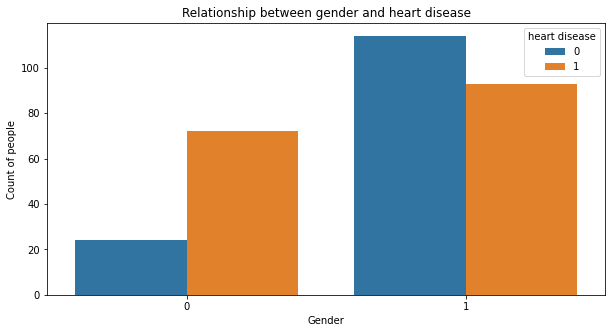

In [42]:
#Exploring the relationship between gender and heart disease
plt.figure(figsize=(10,5))
sns.countplot(x="sex", hue="heart disease", data=df_heart)
plt.title("Relationship between gender and heart disease")
plt.xlabel("Gender")
plt.ylabel("Count of people")

The dataset was imported with the gender categories already encoded. The assumption here is that female was encoded as 0 and male encoded as 1. From the graph, it can be inferred that there are more male patients than female patients who go for a heart checkup but a patient is more likely to have a heart disease if she is a woman than if he is a man. This is because the ratio of people who have a heart disease to those who don't is high in women than men.

Text(0.5, 1.0, 'Relationship between age and heart disease')

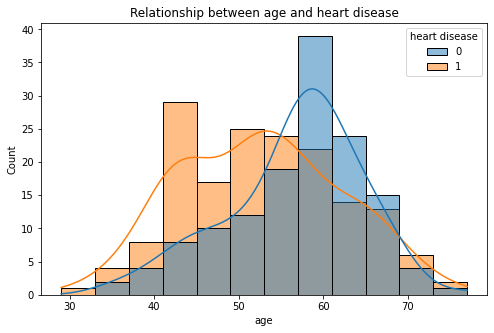

In [47]:
#Exploring the relationship between age and heart disease
plt.figure(figsize=(8,5))
sns.histplot(x="age", hue ="heart disease", data=df_heart, kde=True)
plt.xlabel("age")
plt.title("Relationship between age and heart disease")

It can be inferred that the majority of the people of the people with a heart are within the age range of 42 - 57

In [46]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


In [59]:
fig = px.scatter(df_insurance, x="age", y="charges",
	            color="smoker",
                 hover_name="charges", size_max=30, title="Age Against charges in relation to gender and whether a patient is a smoker")
fig.show()

From the graph, I can say that insurance charges are high for smokers than non-smokers. For non-smokers, insurance charges increases with the age.

In [61]:
#Assuming the two datasets were taken from the same hospital, I merge the dataframes into one
df_all = pd.merge(df_insurance, df_heart , how="inner", on=["age", "sex"])
df_all.head()

,age,sex,bmi,children,smoker,region,charges,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart disease
0,46,0,33.44,1,no,southeast,8240.5896,2,142,177,0,0,160,1,1.4,0,0,2,1
1,46,0,33.44,1,no,southeast,8240.5896,1,105,204,0,1,172,0,0.0,2,0,2,1
2,46,0,33.44,1,no,southeast,8240.5896,0,138,243,0,0,152,1,0.0,1,0,2,1
3,46,0,27.74,0,no,northwest,8026.6666,2,142,177,0,0,160,1,1.4,0,0,2,1
4,46,0,27.74,0,no,northwest,8026.6666,1,105,204,0,1,172,0,0.0,2,0,2,1


In [78]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3423 entries, 0 to 3422
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3423 non-null   int64  
 1   sex            3423 non-null   int64  
 2   bmi            3423 non-null   float64
 3   children       3423 non-null   int64  
 4   smoker         3423 non-null   object 
 5   region         3423 non-null   object 
 6   charges        3423 non-null   float64
 7   cp             3423 non-null   int64  
 8   trestbps       3423 non-null   int64  
 9   chol           3423 non-null   int64  
 10  fbs            3423 non-null   int64  
 11  restecg        3423 non-null   int64  
 12  thalach        3423 non-null   int64  
 13  exang          3423 non-null   int64  
 14  oldpeak        3423 non-null   float64
 15  slope          3423 non-null   int64  
 16  ca             3423 non-null   int64  
 17  thal           3423 non-null   int64  
 18  heart di

There are no NAN values.

Text(0.5, 1.0, 'Age distribution in heart dataset (df_heart)')

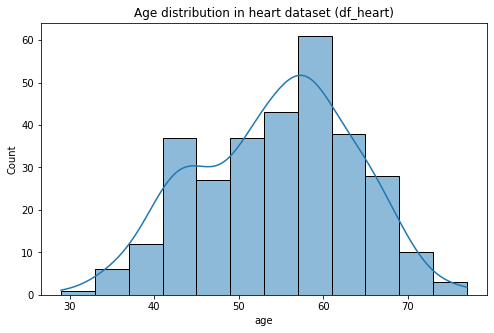

In [71]:
#Exploring the age distribution in the heart dataset
plt.figure(figsize=(8,5))
sns.histplot(x="age", data=df_heart, kde=True)
plt.xlabel("age")
plt.title("Age distribution in heart dataset (df_heart)")

Text(0.5, 1.0, 'Age distribution in merged dataset(df_all)')

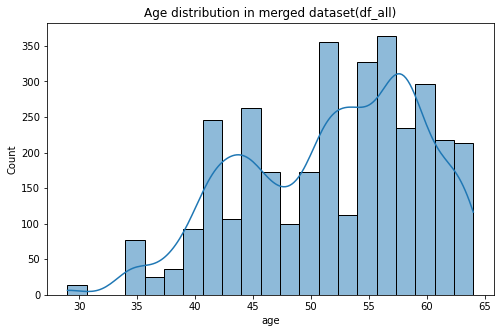

In [70]:
#Exploring the age distribution in the merged dataset
plt.figure(figsize=(8,5))
sns.histplot(x="age", data=df_all, kde=True)
plt.xlabel("age")
plt.title("Age distribution in merged dataset(df_all)")

### Numerical Variables

In [92]:
# Find all variables that are numerical
numerical = [var for var in df_all.columns if df_all[var].dtype != 'O']
print('There are {} numerical variables'.format(len(numerical)))


There are 17 numerical variables


### Numerical - Categorical Variables

In [82]:
# Extract the numerical-categorical variables from the numerical list
""" numerical_categorical variables are expected to have very few and finite unique variables.20 is used as the
    maximum limit for the numerical_categorical variables in this dataset but is not considered to be the standard"""
numerical_categorical = []

for var in numerical:
      if len(df_all[var].unique())<=20:
            print(var, ' values: ', df_all[var].unique())
            numerical_categorical.append(var)
print()
print('There are {} numerical-categorical variables'.format(len(numerical_categorical)))            

sex  values:  [0 1]
children  values:  [1 0 2 3 4 5]
cp  values:  [2 1 0 3]
fbs  values:  [0 1]
restecg  values:  [0 1 2]
exang  values:  [1 0]
slope  values:  [0 2 1]
ca  values:  [0 1 2 3 4]
thal  values:  [2 3 1 0]
heart disease  values:  [1 0]

There are 10 numerical-categorical variables


### Numerical - Continuous Variables

In [97]:
#The numerical_continuous variables are present in numerical but not numerical_categorical
"""charges will be used later on as a target for regression analysis, so i'll skip it"""
numerical_continuous = [var for var in numerical if var not in numerical_categorical and var not in ['charges']]
print('There are {} numerical-continuous variables'.format(len(numerical_continuous))) 
numerical_continuous

There are 6 numerical-continuous variables


['age', 'bmi', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Categorical Variables

In [91]:
#Finding the non-encoded categorical variables
categorical = [var for var in df_all.columns if df_all[var].dtype == 'O']
print('There are {} categorical-categorical variables'.format(len(categorical)))
categorical

There are 2 categorical-categorical variables


['smoker', 'region']

### Outliers

In [109]:
#Using a boxplot to determine if the numerical_continuous contains outliers (Histogram would come in handy too)
for var in numerical_continuous:
    fig = px.box(df_all, y=var, title=var,)
    fig.show()
    
    fig = px.scatter(df_all, x=var, size_max=60,title=var)
    fig.show()

trestbs, chol and oldpeak have positively skewed outliers while thalach has negatively skewed outliers. Age and bmi are well distributed.

### Employing Z-Score to test and handle outliers

In [139]:
from scipy import stats
for var in numerical_continuous:
    if var!='age' and var!='bmi':
        zscore = np.abs(stats.zscore(df_all[var]))
        print(zscore)

[0.69010461 1.5147449  0.4517425  ... 0.02498171 0.57092356 0.44211541]
[1.38959907 0.82654497 0.0132446  ... 0.04931696 0.84739883 0.80005576]
[0.36310075 0.89639809 0.0075692  ... 0.94083953 0.14089353 2.52559314]
[0.33991559 0.85301263 0.85301263 ... 0.85301263 1.78847127 0.85117054]


In [134]:
threshold = 3
print(np.where(zscore > 3))

(array([114, 121, 128, 135, 142, 149, 156, 163, 170, 177, 184, 191, 780,
       784, 788, 792, 796, 800, 804, 808, 812, 816, 820, 824, 828],
      dtype=int64),)


In [125]:
print(zscore)

[0.33991559 0.85301263 0.85301263 ... 0.85301263 1.78847127 0.85117054]


In [142]:
numerical_continuous

['age', 'bmi', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [153]:
df_all_clean = df_all
for var in numerical_continuous:
    if var!='age' and var!='bmi':
        df_all_clean = df_all_clean[(zscore < 3)]

ValueError: Item wrong length 3423 instead of 3398.